Simple Linear Regression

Objectives:

1. To use scikit-learn to implement Simple Linear Regression
2. To create a model, train it and test the model 



In [3]:
# importing necessary packages

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [4]:
# reading the csv file 

df = pd.read_csv('FuelConsumptionCo2.csv')

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Data Exploration
-Descriptive exploration of the dataset

In [6]:
# summarization of the data

df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Let us explore more about the features

In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


Let us plot these features using histplot

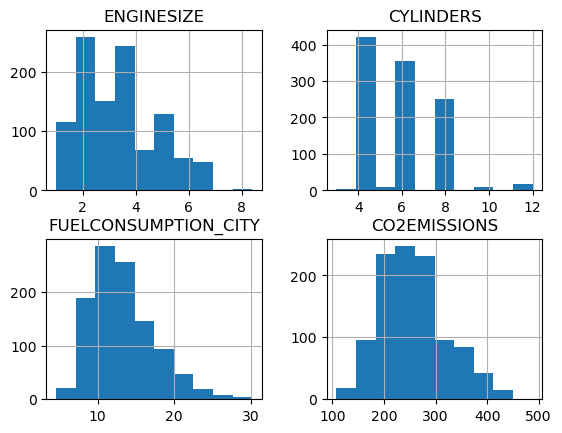

In [10]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
viz.hist()
plt.show()

Now let us plot these features against the emmisions, to see how linear the relationship is 
For this we use ScatterPlot


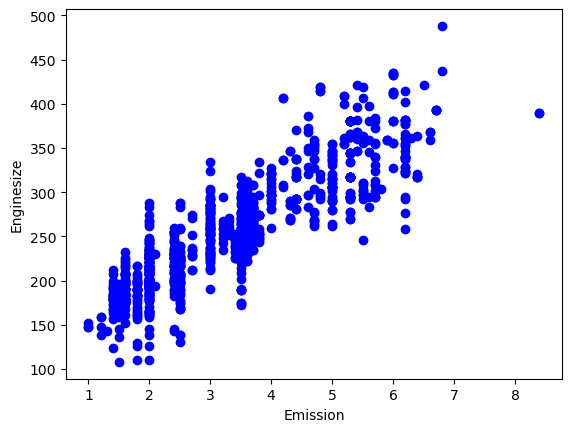

In [13]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Emission')
plt.ylabel('Enginesize')
plt.show()

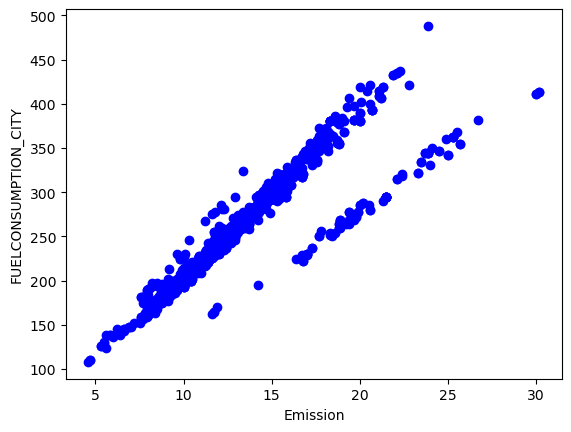

In [14]:
plt.scatter(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('Emission')
plt.ylabel('FUELCONSUMPTION_CITY')
plt.show()

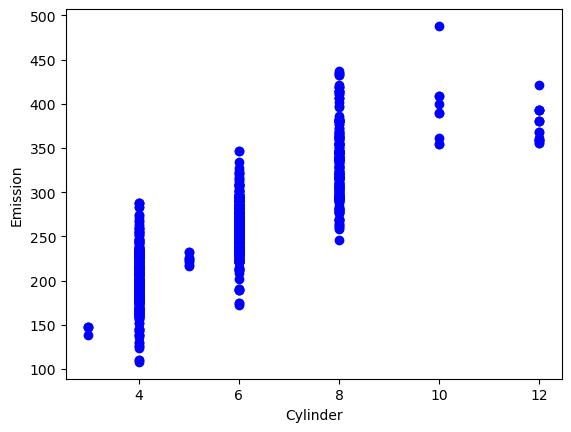

In [15]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Cylinder')
plt.ylabel('Emission')
plt.show()

Splittind the dataset into train and test sets. 80% of the dataset will be used for training and 20% for testing. 
Masking the data to select random rows using np.random.rand()

In [16]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

# Simple Regression Model

Using the training set and sklearn package to model the data

In [18]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [21]:
train_X = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_X,train_y)

LinearRegression()

In [22]:
# printing the cofficients and Intercepts

print('Cofficients:',regr.coef_)
print('Intercept:',regr.intercept_)


Cofficients: [[38.37404196]]
Intercept: [127.74838026]


Plotting the fit line

Text(0, 0.5, 'Emission')

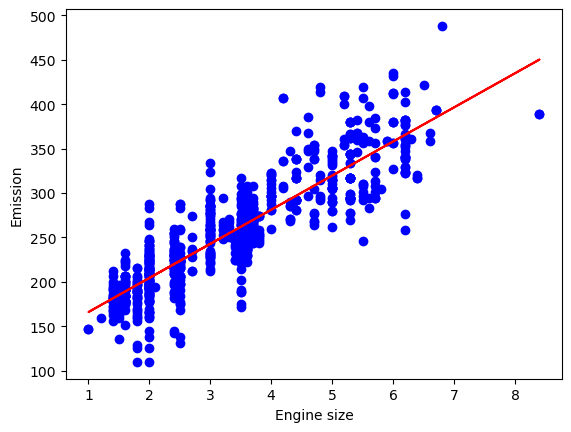

In [25]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_X, regr.coef_[0][0]*train_X + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation


Comapring the actual values and the predicted values to claculate the accuracy of a regression model.
We use the test data to evaluate how accurate the model is working. We can use the methods:
    1.Mean Absolute Error
    2.Mean Squared Error (MSE)
    3.Root Mean Squared Error (RMSE)
    4.R-squared is not an error, but rather a popular metric to measure the performance of the regression model.
The metrics is provided by the package sklearn

In [29]:
from sklearn.metrics import r2_score

test_X = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_X)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )


Mean absolute error: 26.87
R2-score: 0.74


The model's predictions are off by approximately 26.87 units from the actual values.

An R2-score of 0.74 suggests that approximately 74% of the variance in the dependent variable(EMISSION) can be explained by the independent variable(ENGINESIZE) in your model.

##### Let us see what the evaluation metrics are if we trained a regression model for the feature FUELCONSUMPTION_COMB. 

In [45]:
train_x = train[['CYLINDERS']]

test_x = test[['CYLINDERS']]


In [46]:
regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)

LinearRegression()

In [50]:
# finding the predictions using test_x data

predictions = regr.predict(test_x)
print("Mean Absolute Error: %.2f"%
     np.mean(np.absolute(predictions - test_y)))



Mean Absolute Error: 29.15


The model's predictions are off by approximately 29.15 units from the actual values